# Qiskit from Scratch
## Austin Python Meetup
### Tuesday, April 16, 2019

## Installation & Set Up
Only needs doing once

### install packages

In [21]:
%pip install qiskit-aqua qiskit

  Using cached https://files.pythonhosted.org/packages/77/de/47e35a97b2b05c2fadbec67d44cfcdcd09b8086951b331d82de90d2912da/jsonschema-2.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/56/7d/0737aed3e157fb90a1eaecb1cbfa5742fa4206fb305c8f157b666b71da14/scikit_learn-0.20.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/bc/b4/f54f8533aad0645431bfda2cc3d20913a305779c80f8cb71229e8b615c5b/marshmallow-2.19.2-py2.py3-none-any.whl
  Found existing installation: jsonschema 3.0.1
    Uninstalling jsonschema-3.0.1:
      Successfully uninstalled jsonschema-3.0.1
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
  Found existing installation: marshmallow 3.0.0b8
    Uninstalling marshmallow-3.0.0b8:
      Successfully uninstalled marshmallow-3.0.0b8
Note: you may need to restart the kernel to use updated packages.


### obtain API token

https://quantumexperience.ng.bluemix.net/qx/account/advanced

### save API token 

In [ ]:
# from qiskit import IBMQ
# IBMQ.save_account('78a3b...') # the token you obtaine above

## First circuit

quantum programs == quantum circuits (unless doing quantum annealing ie D-Wave)

In [30]:
%matplotlib inline
import qiskit as qk

### Allocate a circuit with 2 qubits and 2 classical bits.

In [64]:
qr = qk.QuantumRegister(2)
cr = qk.ClassicalRegister(2)
qc = qk.QuantumCircuit(qr,cr)

### Add Hadamard gate to put first qubit in superposition

In [65]:
qc.h(qr[0])

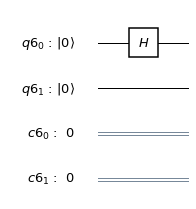

In [66]:
qc.draw(output='mpl')

### Add Contolled-Not gate to entangle qubits

In [67]:
qc.cx(qr[0], qr[1])

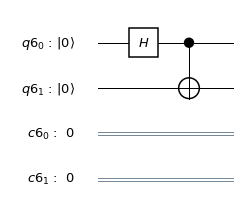

In [68]:
qc.draw(output='mpl')

### Add measurerement of both qubits

In [84]:
qc.measure(qr,cr)

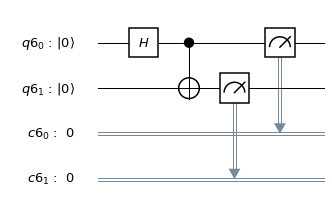

In [85]:
qc.draw(output='mpl')

### Simulate circuit classically

In [73]:
qk.Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

In [97]:
sim = qk.Aer.get_backend('qasm_simulator')

In [98]:
res = qk.execute(qc, sim).result()

In [102]:
qk.tools.visualization.iplot_histogram(res.get_counts())

### Run circuit on real quantum computer

In [108]:
qk.IBMQ.load_accounts()
procs = qk.IBMQ.backends()
procs

/home/dm/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [126]:
from qiskit.tools import monitor
job = qk.execute(qc, backend=qk.providers.ibmq.least_busy(qk.IBMQ.backends()), shots=2**13)
mon = monitor.job_monitor(job)
res2 = job.result()

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [127]:
qk.tools.visualization.iplot_histogram(res2.get_counts(qc))